In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
digits = pd.read_csv('train.csv')

In [43]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
digits['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [0]:
#LOGISTIC REGRESSION MODEL

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [0]:
X = digits.drop('label',axis=1)
y = digits['label']

In [0]:
lr = LogisticRegression()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [0]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
Predict = lr.predict(X_test)

ValueError: ignored

In [0]:
Predict

In [0]:
print(accuracy_score(y_test,Predict))

In [0]:
print(confusion_matrix(y_test,Predict))

In [0]:
print(classification_report(y_test,Predict))

In [0]:
#KNN MODEL

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalar = StandardScaler()

In [17]:
scalar.fit(digits.drop('label',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
Dataset2 = scalar.transform(digits.drop('label',axis=1))

In [19]:
type(Dataset2)

numpy.ndarray

In [0]:
digits2 = pd.DataFrame(Dataset2,columns=digits.columns[1:])

In [21]:
digits2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041959,-0.041959,0.0,...,-0.141207,-0.115766,-0.092081,-0.077254,-0.055307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041996,-0.041996,0.0,0.0,-0.041996,-0.041996,-0.061707,-0.059444,-0.060875,-0.047928,-0.041996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041959,-0.041959,0.0,...,-0.141207,-0.115766,-0.092081,-0.077254,-0.055307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041996,-0.041996,0.0,0.0,-0.041996,-0.041996,-0.061707,-0.059444,-0.060875,-0.047928,-0.041996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041959,-0.041959,0.0,...,-0.141207,-0.115766,-0.092081,-0.077254,-0.055307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041996,-0.041996,0.0,0.0,-0.041996,-0.041996,-0.061707,-0.059444,-0.060875,-0.047928,-0.041996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041959,-0.041959,0.0,...,-0.141207,-0.115766,-0.092081,-0.077254,-0.055307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041996,-0.041996,0.0,0.0,-0.041996,-0.041996,-0.061707,-0.059444,-0.060875,-0.047928,-0.041996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041959,-0.041959,0.0,...,-0.141207,-0.115766,-0.092081,-0.077254,-0.055307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041996,-0.041996,0.0,0.0,-0.041996,-0.041996,-0.061707,-0.059444,-0.060875,-0.047928,-0.041996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=2)

In [0]:
X = digits2
y = digits['label']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
knnpredict = knn.predict(X_test)

ValueError: ignored

In [13]:
accuracy_score(y_test,knnpredict)

NameError: ignored

In [0]:
print(classification_report(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       321
           1       0.95      0.98      0.96       369
           2       0.93      0.90      0.91       346
           3       0.88      0.90      0.89       323
           4       0.93      0.90      0.91       346
           5       0.87      0.88      0.87       305
           6       0.95      0.94      0.95       322
           7       0.90      0.90      0.90       347
           8       0.93      0.82      0.87       322
           9       0.83      0.90      0.86       299

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



In [0]:
print(confusion_matrix(y_test,knnpredict))

[[312   0   2   0   0   2   4   1   0   0]
 [  0 360   2   0   0   1   0   3   2   1]
 [  5   4 311  15   2   2   0   5   2   0]
 [  1   2   6 291   1   9   0   5   5   3]
 [  0   5   3   3 310   1   0   4   0  20]
 [  3   0   1  12   0 267   7   0   8   7]
 [ 11   0   3   0   1   3 303   0   1   0]
 [  0   4   1   0   6   0   0 314   0  22]
 [  6   5   4   8   3  22   4   3 264   3]
 [  3   0   1   3   9   0   0  13   2 268]]


In [0]:
#elbow method 

In [0]:
err_rate = []

for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knnpred = knn.predict(X_test)
  err_rate.append(np.mean(knnpred != y_test))

Text(0, 0.5, 'Error Rate')

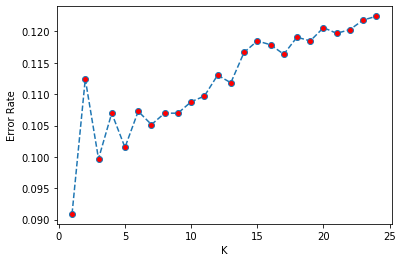

In [0]:
plt.plot(range(1,25),err_rate,linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
#DECISON TREE

In [0]:
X = digits.drop('label',axis=1)
y = digits['label']

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [0]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
dtcpredict = dtc.predict(X_test)

In [0]:
print(confusion_matrix(y_test,dtcpredict))

[[269   0   7  12   2   9   6   3   6   7]
 [  2 346   5   2   0   4   1   2   3   4]
 [  6   8 261  11   3   2  18  15  17   5]
 [  7   4  11 249   3  19   4   5  13   8]
 [  1   3  14   5 275   7   8   8   7  18]
 [  6  12   2  26   5 220   9   3  10  12]
 [  9   1  11   6  12  19 253   4   6   1]
 [  2   4   9   2   8   1   0 297   8  16]
 [  1  11  14  21  11  10  10   6 221  17]
 [  2   1   6   6  24  15   2  12  11 220]]


In [0]:
print(classification_report(y_test,dtcpredict))
print(accuracy_score(y_test,dtcpredict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       321
           1       0.89      0.94      0.91       369
           2       0.77      0.75      0.76       346
           3       0.73      0.77      0.75       323
           4       0.80      0.79      0.80       346
           5       0.72      0.72      0.72       305
           6       0.81      0.79      0.80       322
           7       0.84      0.86      0.85       347
           8       0.73      0.69      0.71       322
           9       0.71      0.74      0.72       299

    accuracy                           0.79      3300
   macro avg       0.79      0.79      0.79      3300
weighted avg       0.79      0.79      0.79      3300

0.7912121212121213


In [0]:
#RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000)

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfcpredict = rfc.predict(X_test)

In [0]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,rfcpredict))
print('\n')
print("ACCURACY SCORE")
print(accuracy_score(y_test,rfcpredict))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       321
           1       0.97      0.97      0.97       369
           2       0.94      0.93      0.94       346
           3       0.93      0.94      0.94       323
           4       0.95      0.95      0.95       346
           5       0.94      0.92      0.93       305
           6       0.96      0.95      0.95       322
           7       0.96      0.92      0.94       347
           8       0.94      0.93      0.93       322
           9       0.89      0.92      0.90       299

    accuracy                           0.94      3300
   macro avg       0.94      0.94      0.94      3300
weighted avg       0.94      0.94      0.94      3300



ACCURACY SCORE
0.9415151515151515


In [0]:
digits.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [0]:
digits.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [0]:
#Support Vector Machine (SVM)

In [0]:
from sklearn.svm import SVC

In [0]:
sv = SVC()

In [0]:
sv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
sv_predict = sv.predict(X_test)

In [0]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,sv_predict))
print('\n')
print("ACCURACY SCORE")
print(accuracy_score(y_test,sv_predict))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.11      1.00      0.20       369
           2       0.00      0.00      0.00       346
           3       0.00      0.00      0.00       323
           4       0.00      0.00      0.00       346
           5       0.00      0.00      0.00       305
           6       0.00      0.00      0.00       322
           7       0.00      0.00      0.00       347
           8       0.00      0.00      0.00       322
           9       0.00      0.00      0.00       299

    accuracy                           0.11      3300
   macro avg       0.01      0.10      0.02      3300
weighted avg       0.01      0.11      0.02      3300



ACCURACY SCORE
0.11181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [0]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [0]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.108, total=  43.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.108, total=  44.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.109, total=  44.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.108, total=  44.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.108, total=  44.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.109, total=  44.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.108, total=  44.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.108, total=  44.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.109, total=  44.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 55.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [0]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
NewSvmPredict = grid.predict(X_test)

In [0]:
print(accuracy_score(y_test,NewSvmPredict))

0.11181818181818182


In [0]:
print(classification_report(y_test,NewSvmPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.11      1.00      0.20       369
           2       0.00      0.00      0.00       346
           3       0.00      0.00      0.00       323
           4       0.00      0.00      0.00       346
           5       0.00      0.00      0.00       305
           6       0.00      0.00      0.00       322
           7       0.00      0.00      0.00       347
           8       0.00      0.00      0.00       322
           9       0.00      0.00      0.00       299

    accuracy                           0.11      3300
   macro avg       0.01      0.10      0.02      3300
weighted avg       0.01      0.11      0.02      3300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
